In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [2]:
combo_ring = pd.read_csv('../dataset/PyRadiomics_files/radiomics_combo_ring.csv')
lesion = pd.read_csv('../dataset/PyRadiomics_files/radiomics_lesion.csv')

In [3]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
dp = data_pd[['image_id', 'dx']]
dp

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [5]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032215'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025277'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029819'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0034047'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029609'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025061'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028361'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0026042'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030687'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025987'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030006'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0031070'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028110'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033377'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033031'].index, inplace = True)

In [6]:
lesion

,image_id,dx,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0027419,bkl,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ISIC_0025030,bkl,192.0,217.0,5.409632e+09,4.369942,13.0,3.540864,250.0,204.184127,...,728.729959,0.000604,6.710587,0.407631,9.897791,3.385021,0.000121,1517.958114,0.023034,0.177788
2,ISIC_0026769,bkl,105.0,192.0,2.588999e+08,5.874022,59.0,1.765561,212.0,147.007357,...,1229.063272,0.001027,7.489928,0.568801,2.107322,0.149914,0.003139,2997.610353,0.168758,5.490538
3,ISIC_0025661,bkl,79.0,169.0,2.307388e+08,5.860003,46.0,2.351846,220.0,116.413229,...,1583.524561,0.000653,7.574148,0.554173,2.446843,0.091326,0.002431,5165.659406,0.078868,9.165628
4,ISIC_0031633,bkl,136.0,212.0,2.066242e+09,5.679751,41.0,2.811163,229.0,179.691068,...,998.796114,0.000971,8.342909,0.322720,17.334793,0.347983,0.000902,1594.235155,0.075273,1.806496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,ISIC_0033084,akiec,135.0,202.0,1.920089e+09,5.562589,44.0,1.886217,239.0,167.011429,...,657.540211,0.001365,7.895817,0.391249,9.432622,0.930090,0.000610,1953.540462,0.082483,0.952750
9995,ISIC_0033550,akiec,125.0,200.0,2.621105e+09,5.757204,45.0,2.209660,225.0,165.310586,...,1024.403900,0.000705,8.123790,0.385832,9.842129,0.612577,0.000555,2048.448485,0.075306,1.049169
9996,ISIC_0033536,akiec,149.0,203.0,3.442482e+09,5.317382,31.0,2.566600,226.0,177.223965,...,884.973606,0.000609,7.731134,0.387643,8.827970,1.048729,0.000350,1720.699298,0.051668,0.591937
9997,ISIC_0032854,akiec,135.0,194.0,1.034287e+09,5.421503,36.0,2.192556,212.0,165.167821,...,693.060344,0.001359,7.428797,0.469631,4.196538,0.679602,0.000938,1368.693240,0.094541,0.999094


In [7]:
# pd.merge(lesion, ex_ring, on = )
lesion_combo_ring = pd.merge(lesion, combo_ring, on = 'image_id')

In [8]:
lesion_combo_ring['dx_y']

0         bkl
1         bkl
2         bkl
3         bkl
4         bkl
        ...  
9994    akiec
9995    akiec
9996    akiec
9997    akiec
9998      mel
Name: dx_y, Length: 9999, dtype: object

In [9]:
X = lesion_combo_ring.drop(['image_id', 'dx_x','dx_y'], axis = 1)
# dp = data_pd[['image_id', 'dx']]
# print(dp)
y = lesion_combo_ring['dx_x']

In [10]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [ ]:
# from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# # Initializing the RandomOverSampler object with a specified random_state for reproducibility.
# ROS = RandomOverSampler(random_state = 42)

# # This method generates a balanced dataset by oversampling the minority class
# x_resampled, y_resampled = ROS.fit_resample(X, y)


In [ ]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# x_resampled, y_resampled = smt.fit_resample(X, y)


In [11]:
# x_resampled.isnull().sum()


In [14]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # calculate VIF for each feature

# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(lesion_ring.values, i) for i in range(lesion_ring.shape[1])]

# vif["features"] = lesion_ring.columns

# # print VIF values

# print(vif)

In [15]:
# from sklearn.feature_selection import SelectKBest

# from sklearn.feature_selection import f_regression

# # define number of features to keep

# k = 30
# lr = lesion_ring.drop(['image_id'], axis = 1)
# # perform feature selection

# X_new = SelectKBest(f_regression, k=k).fit_transform(lr, y)

# # get feature names of selected features

# selected_features = lr.columns[SelectKBest(f_regression, k=k).fit(lr, y).get_support()]

# # print selected features

# print(selected_features)

In [16]:
# xx = x_resampled[selected_features]
# print(xx.head())

In [12]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
# x_resampled, y_resampled = smt.fit_resample(X_train_n, y_train_n)


In [18]:
# x_resampled_n, y_resampled_n = ROS.fit_resample(X_train_n, y_train_n)


In [19]:
# x_resampled['dx_y']

In [20]:


#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(x_resampled)
X_test_scaled_n = sc.transform(X_test_n)

In [21]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [ ]:
svm.fit(X_train_scaled_n,y_resampled.values)


In [13]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# y_pretrain_n =svm.predict(x_val_n)

# accuracy_score(y_val_n, y_pretrain_n)


In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(svm, X_train_scaled_n, y_resampled_n, cv = 500, scoring='accuracy')


In [ ]:
print(scores)

1800 1800 200 200
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.67      1.00      0.80       134
           6       0.00      0.00      0.00         3

    accuracy                           0.67       200
   macro avg       0.10      0.14      0.11       200
weighted avg       0.45      0.67      0.54       200



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

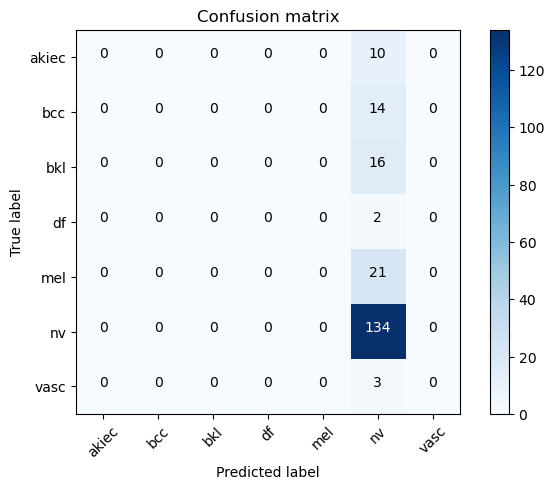

In [122]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf_lession_ring50.png', dpi = 100)
plt.show()

In [14]:
clf = RandomForestClassifier( random_state=42)

In [16]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

In [17]:
clf.fit(X_train_scaled_n, y_resampled.values)


NameError: name 'X_train_scaled_n' is not defined

In [28]:
print(accuracy_score(y_test_n, y_pre_nn))

0.918


              precision    recall  f1-score   support

           0       0.98      0.71      0.83        63
           1       0.85      0.39      0.54       104
           2       0.93      0.99      0.96       196
           3       0.71      0.17      0.28        29
           4       0.88      0.89      0.88       220
           5       0.92      1.00      0.96      1360
           6       0.20      0.04      0.06        28

    accuracy                           0.92      2000
   macro avg       0.78      0.60      0.64      2000
weighted avg       0.91      0.92      0.90      2000



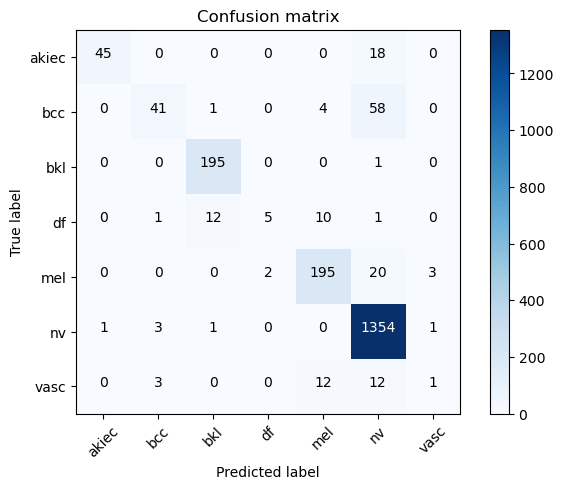

In [ ]:
# x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
# print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(X_test_scaled_n)
accuracy_score(y_test_n, y_pre_nn)
xp = confusion_matrix(y_test_n,y_pre_nn)
print(classification_report(y_test_n, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
plt.show()

[[7.14285714e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.85714286e-01 0.00000000e+00]
 [0.00000000e+00 3.94230769e-01 9.61538462e-03 0.00000000e+00
  3.84615385e-02 5.57692308e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.94897959e-01 0.00000000e+00
  0.00000000e+00 5.10204082e-03 0.00000000e+00]
 [0.00000000e+00 3.44827586e-02 4.13793103e-01 1.72413793e-01
  3.44827586e-01 3.44827586e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.09090909e-03
  8.86363636e-01 9.09090909e-02 1.36363636e-02]
 [7.35294118e-04 2.20588235e-03 7.35294118e-04 0.00000000e+00
  0.00000000e+00 9.95588235e-01 7.35294118e-04]
 [0.00000000e+00 1.07142857e-01 0.00000000e+00 0.00000000e+00
  4.28571429e-01 4.28571429e-01 3.57142857e-02]]


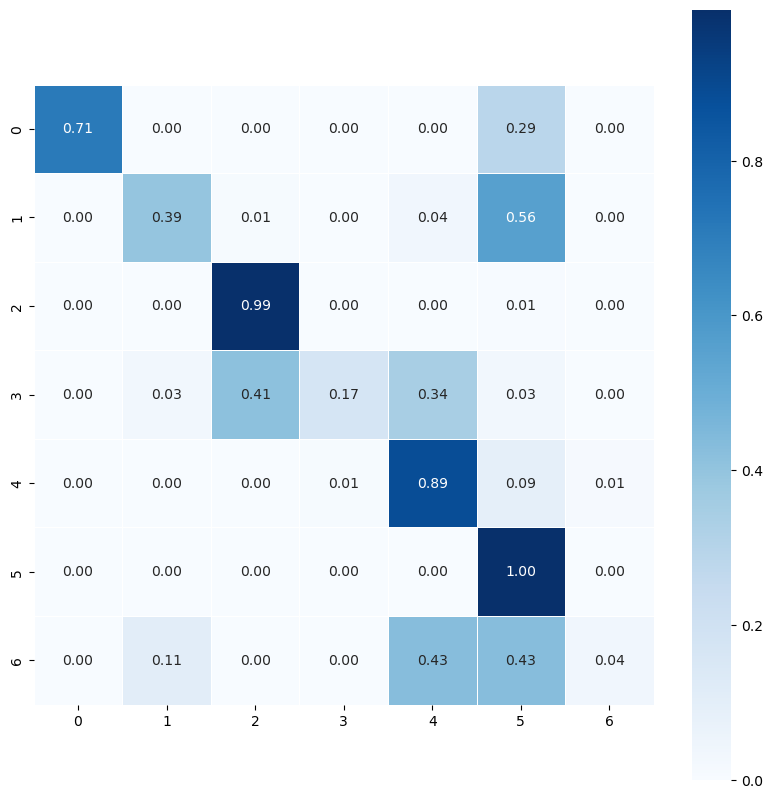

In [36]:
cm = confusion_matrix(y_test_n, y_pre_nn)
print(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues');
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
# plot_confusion_matrix(cm, plot_labels)

In [29]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3,4,5,6]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test_n)==l,
                                                      np.array(y_pre_nn)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [30]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


,class,sensitivity,specificity
0,0,0.999484,0.714286
1,1,0.996308,0.394231
2,2,0.992239,0.994898
3,3,0.998985,0.172414
4,4,0.985393,0.886364
5,5,0.828125,0.995588
6,6,0.997972,0.035714


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.84      0.40      0.55       104
           2       0.95      0.99      0.97       196
           3       0.62      0.17      0.27        29
           4       0.87      0.89      0.88       220
           5       0.93      1.00      0.96      1360
           6       0.33      0.07      0.12        28

    accuracy                           0.92      2000
   macro avg       0.79      0.61      0.66      2000
weighted avg       0.91      0.92      0.91      2000



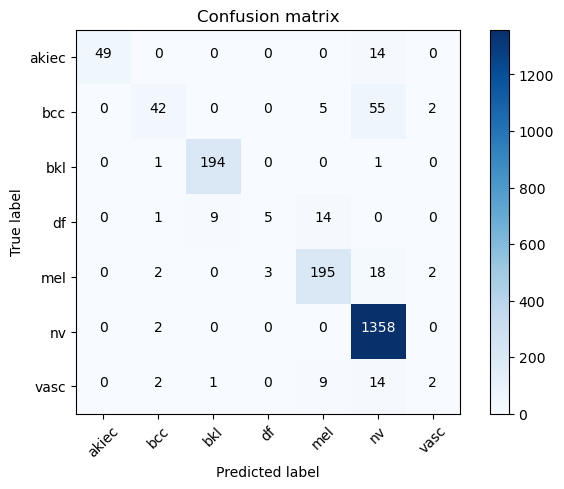

In [ ]:
# x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
# print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(X_test_scaled_n)
accuracy_score(y_test_n, y_pre_nn)
xp = confusion_matrix(y_test_n,y_pre_nn)
print(classification_report(y_test_n, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
plt.show()

1800 1800 200 200
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       1.00      0.29      0.44        14
           2       0.94      1.00      0.97        16
           3       0.00      0.00      0.00         2
           4       0.78      0.86      0.82        21
           5       0.89      1.00      0.94       134
           6       0.00      0.00      0.00         3

    accuracy                           0.89       200
   macro avg       0.66      0.52      0.55       200
weighted avg       0.88      0.89      0.86       200



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

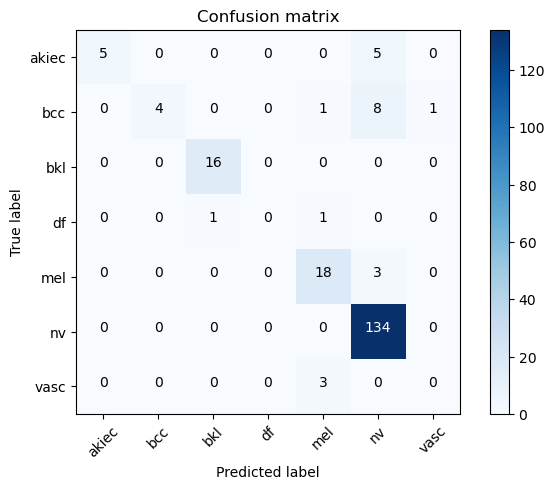

In [45]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_without_sampling.png', dpi = 100)
plt.show()

In [25]:
y_pre_nn

array([5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 4, 5, 0, 5, 5, 2, 4, 1, 2, 2, 5, 4, 5, 5,
       5, 5, 5, 5, 5, 4, 0, 0, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 1, 5, 5, 5,
       5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 5, 5, 2, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 5, 6, 2, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 4, 2, 4, 5, 5, 4, 5, 5, 5, 2, 5, 1, 2, 5, 5, 4, 5, 4,
       5, 2])

In [28]:
np.std([1,1,1,1,1,1,1])

np.float64(0.0)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        65
           1       0.71      0.23      0.35       103
           2       0.97      0.99      0.98       220
           3       0.67      0.09      0.15        23
           4       0.87      0.84      0.85       221
           5       0.91      1.00      0.95      1340
           6       0.50      0.04      0.07        28

    accuracy                           0.91      2000
   macro avg       0.80      0.57      0.61      2000
weighted avg       0.89      0.91      0.89      2000

   class  sensitivity  specificity
0      0     1.000000     0.784615
1      1     0.994729     0.233010
2      2     0.996629     0.990909
3      3     0.999494     0.086957
4      4     0.984823     0.837104
5      5     0.792424     0.997761
6      6     0.999493     0.035714


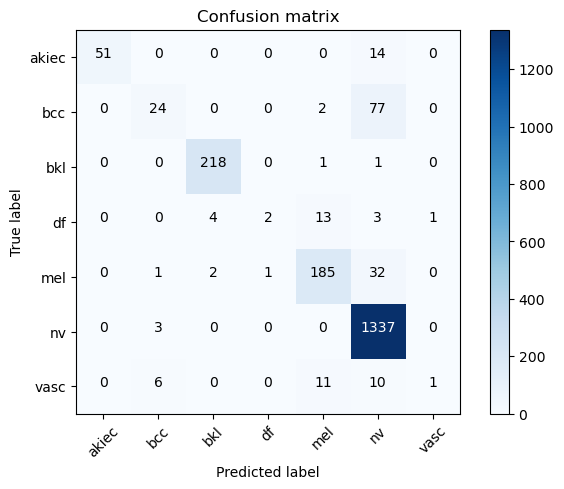

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        65
           1       0.87      0.47      0.61       103
           2       0.94      0.99      0.96       220
           3       1.00      0.22      0.36        23
           4       0.89      0.90      0.90       221
           5       0.94      1.00      0.97      1340
           6       0.67      0.21      0.32        28

    accuracy                           0.94      2000
   macro avg       0.90      0.66      0.72      2000
weighted avg       0.93      0.94      0.93      2000

   class  sensitivity  specificity
0      0     1.000000     0.861538
1      1     0.996310     0.466019
2      2     0.991573     0.990909
3      3     1.000000     0.217391
4      4     0.985947     0.904977
5      5     0.880303     0.998507
6      6     0.998479     0.214286


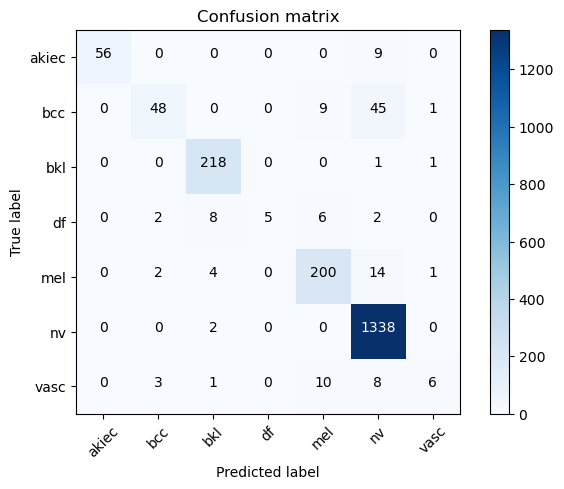

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        66
           1       0.90      0.44      0.59       102
           2       0.94      0.99      0.97       219
           3       1.00      0.30      0.47        23
           4       0.88      0.90      0.89       222
           5       0.94      1.00      0.97      1340
           6       0.50      0.11      0.18        28

    accuracy                           0.93      2000
   macro avg       0.88      0.66      0.71      2000
weighted avg       0.93      0.93      0.92      2000

   class  sensitivity  specificity
0      0     1.000000     0.878788
1      1     0.997366     0.441176
2      2     0.992701     0.990868
3      3     1.000000     0.304348
4      4     0.984814     0.896396
5      5     0.872727     0.999254
6      6     0.998479     0.107143


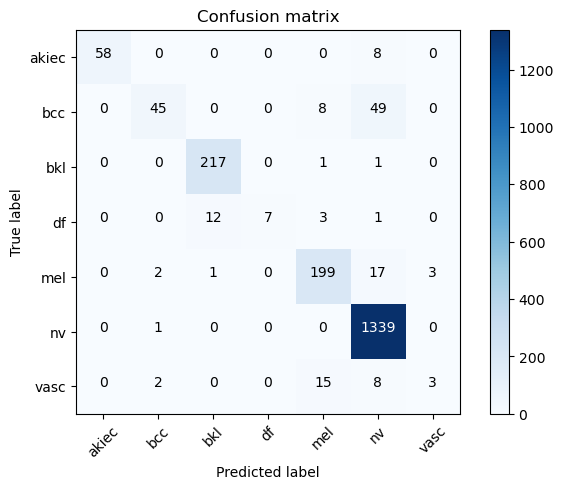

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        66
           1       0.93      0.36      0.52       102
           2       0.95      0.99      0.97       219
           3       1.00      0.35      0.52        23
           4       0.93      0.91      0.92       222
           5       0.92      1.00      0.96      1340
           6       0.57      0.14      0.23        28

    accuracy                           0.93      2000
   macro avg       0.90      0.65      0.71      2000
weighted avg       0.93      0.93      0.92      2000

   class  sensitivity  specificity
0      0     1.000000     0.787879
1      1     0.998419     0.362745
2      2     0.993824     0.986301
3      3     1.000000     0.347826
4      4     0.991001     0.905405
5      5     0.833333     0.999254
6      6     0.998479     0.142857


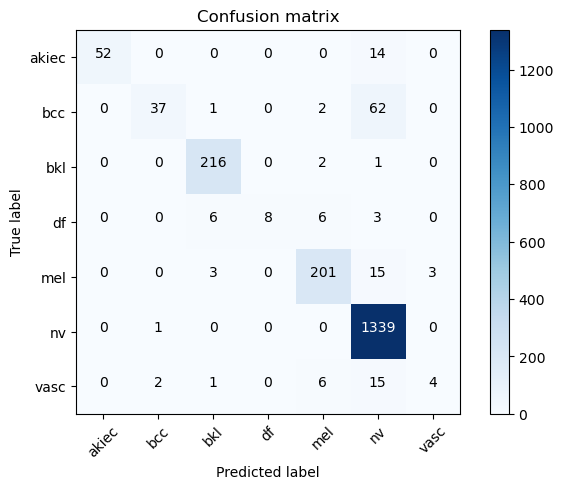

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        65
           1       0.84      0.41      0.55       102
           2       0.93      0.99      0.96       219
           3       1.00      0.13      0.23        23
           4       0.91      0.86      0.88       221
           5       0.92      1.00      0.96      1340
           6       0.60      0.10      0.18        29

    accuracy                           0.92      1999
   macro avg       0.89      0.60      0.66      1999
weighted avg       0.92      0.92      0.91      1999

   class  sensitivity  specificity
0      0     1.000000     0.723077
1      1     0.995783     0.411765
2      2     0.990449     0.990868
3      3     1.000000     0.130435
4      4     0.989314     0.859729
5      5     0.830046     0.999254
6      6     0.998985     0.103448


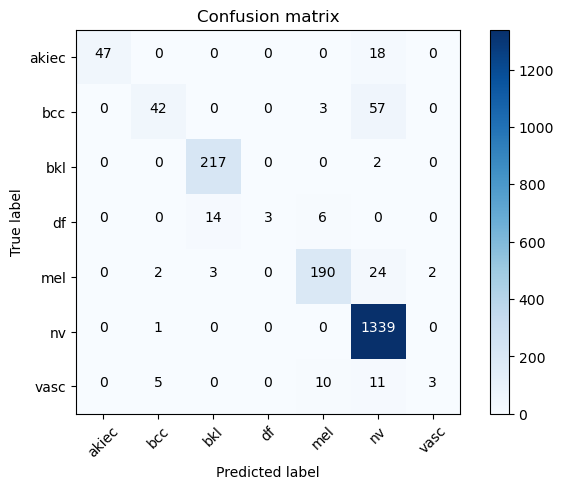

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

smt = SMOTE()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X,y):
    #print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train,y_test = y[train_ind], y[test_ind]
    
    x_resampled, y_resampled = smt.fit_resample(X_train, y_train)

    #scaling and centering the data
    sc = StandardScaler()
    X_train_scaled_n = sc.fit_transform(x_resampled)
    X_test_scaled_n = sc.transform(X_test)
    clf.fit(X_train_scaled_n,y_resampled)

    pred_values_train = clf.predict(X_train_scaled_n)

    pred_values = clf.predict(X_test_scaled_n)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)

    xp_train = confusion_matrix(y_resampled,pred_values_train)

    xp = confusion_matrix(y_test,pred_values)
    # print(classification_report(y_resampled, pred_values_train))

    print(classification_report(y_test, pred_values))
    # print(classification_report(y_train, pred_values_train))

    # res_trin = []
    # for l in [4]:
    #     prec,recall,_,_ = precision_recall_fscore_support(np.array(y_resampled)==l,
    #                                                     np.array(pred_values_train)==l,
    #                                                     pos_label=True,average=None)
    #     res.append([l,recall[0],recall[1]])
    # # print(recall[0], recall[1])

    res = []
    for l in [0,1,2,3,4,5,6]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                        np.array(pred_values)==l,
                                                        pos_label=True,average=None)
        res.append([l,recall[0],recall[1]])
        # print(recall[0], recall[1])
    print(pd.DataFrame(res,columns = ['class','sensitivity','specificity']))
    # xp = confusion_matrix(y_test_nn,y_pre_nn)
    # print(classification_report(y_test_nn, y_pre_nn))
    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
    plot_confusion_matrix(xp, plot_labels)
    # plt.savefig('../presentation/conf_mat_svm_rbf_lession_ring50.png', dpi = 100)
    plt.show()
    plt.close()


avg_acc_score = sum(acc_score_kfold)/5
 
# print('accuracy of each fold : {}'.format(acc_sc

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

smt = SMOTE()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X,y):
    #print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train,y_test = y[train_ind], y[test_ind]
    
    x_resampled, y_resampled = smt.fit_resample(X_train, y_train)

    #scaling and centering the data
    sc = StandardScaler()
    X_train_scaled_n = sc.fit_transform(x_resampled)
    X_test_scaled_n = sc.transform(X_test)
    clf.fit(X_train_scaled_n,y_resampled)

    pred_values_train = clf.predict(X_train_scaled_n)

    pred_values = clf.predict(X_test_scaled_n)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)

    xp_train = confusion_matrix(y_resampled,pred_values_train)

    xp = confusion_matrix(y_test,pred_values)
    print(classification_report(y_resampled, pred_values_train))

    print(classification_report(y_test, pred_values))
    # print(classification_report(y_train, pred_values_train))

    res = []
    for l in [0,1,2,3,4,5,6]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                        np.array(pred_values)==l,
                                                        pos_label=True,average=None)
        res.append([l,recall[0],recall[1]])
    print(recall[0], recall[1])

    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

avg_acc_score = sum(acc_score_kfold)/5
 
# print('accuracy of each fold : {}'.format(acc_sc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6030
           1       1.00      1.00      1.00      6030
           2       1.00      1.00      1.00      6030
           3       1.00      1.00      1.00      6030
           4       1.00      1.00      1.00      6030
           5       1.00      1.00      1.00      6030
           6       1.00      1.00      1.00      6030

    accuracy                           1.00     42210
   macro avg       1.00      1.00      1.00     42210
weighted avg       1.00      1.00      1.00     42210

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        32
           1       0.96      0.48      0.64        52
           2       0.94      0.99      0.96       110
           3       1.00      0.25      0.40        12
           4       0.85      0.83      0.84       110
           5       0.93      1.00      0.96       670
           6       0.50 

KeyboardInterrupt: 

In [23]:
from sklearn.metrics import roc_auc_score


In [ ]:
# y_pred = np.argmax(y_pre_nn, axis=1)
# y_true = np.argmax(y_test_nn, axis=0)
# print(y_pred, y_true)
# print(y_pre_nn, y_test_nn.values)
roc_auc_score(y_test_nn.values, y_pre_nn, multi_class='ovr',average='weighted')

AxisError: axis 1 is out of bounds for array of dimension 1

In [24]:
print("weighted Roc score: " + str(roc_auc_score(y_test_nn,y_pre_nn,multi_class='ovr',average='weighted')))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = clf.predict_proba(x_test_nn)
preds = probs[:,1]
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(7):
#     r = roc_auc_score(y_test_nn[:, i], probs[:, i])
#     # print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

fpr, tpr, _ = metrics.roc_curve(y_test_nn,  preds, pos_label=1)

# fpr, tpr, threshold = metrics.roc_curve(y_test_nn, preds)

metrics.roc_auc_score(y_test_nn, preds)
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [36]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, x_test_nn, y_test_nn) 


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.8 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 72.4 MB/s eta 0:00:00
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 89.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1


In [1]:
import shap


/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test_scaled_n)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

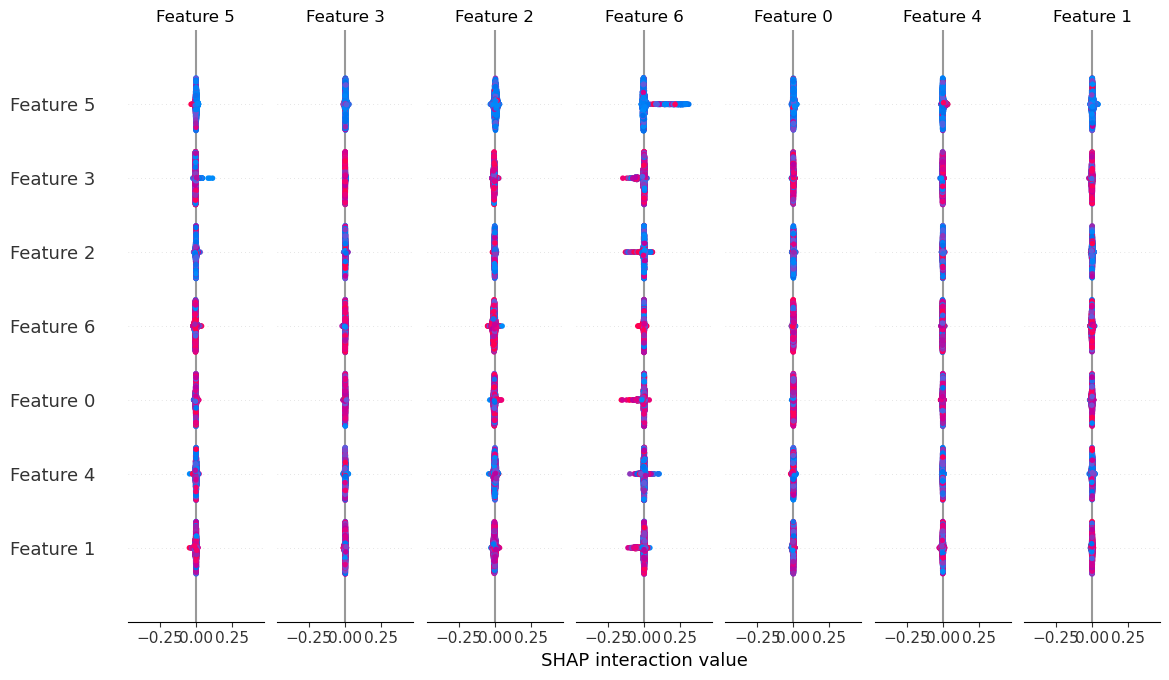

In [49]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test_scaled_n)